In [1]:
import keras
import numpy as np
import pylab
import os
from keras.utils import to_categorical

seed = 7
np.random.seed(seed)

Using TensorFlow backend.


## Create a training set of data from the big image and use the labels from the mask

In [2]:
data_dir = './data/'
training_image = 'lizard_merged.npy'
training_data = np.load(os.path.join(data_dir, training_image))

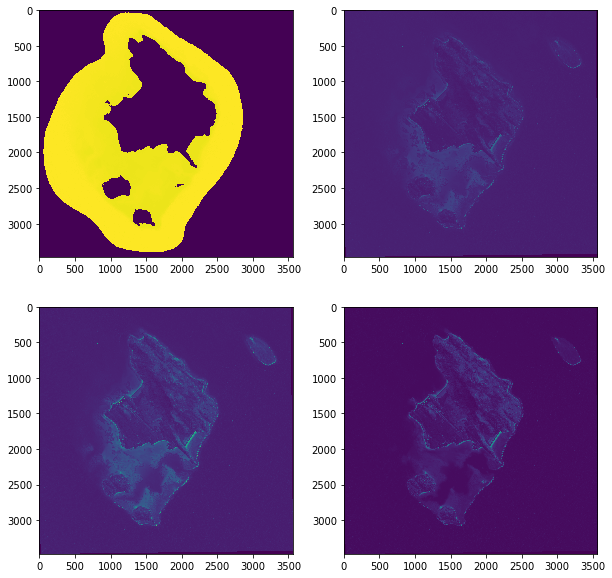

In [3]:
pylab.figure(figsize=(10, 10))
pylab.subplot(221)
pylab.imshow(training_data[0, :, :])
pylab.subplot(222)
pylab.imshow(training_data[1, :, :])
pylab.subplot(223)
pylab.imshow(training_data[2, :, :])
pylab.subplot(224)
pylab.imshow(training_data[3, :, :])

## Load in the labeled data

In [4]:
label_image = 'label_array.npy'
label_data = np.load(os.path.join(data_dir, label_image))

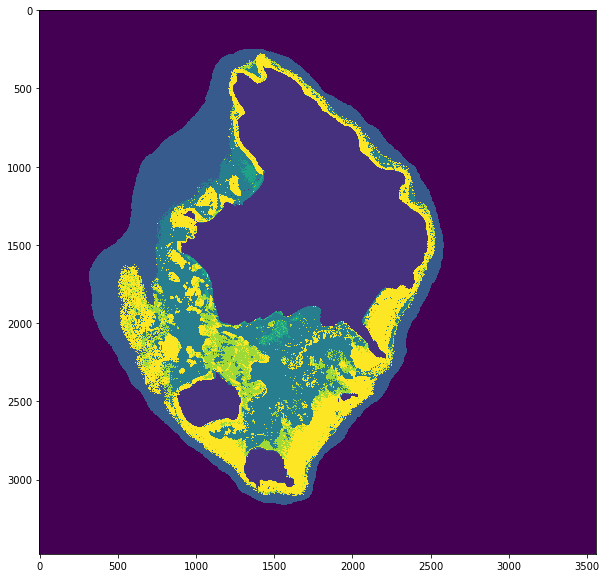

In [5]:
pylab.figure(figsize=(10, 10))
pylab.imshow(label_data)

In [377]:
size = label_data.shape
stride = (1, 1)
training_size = k =(3, 3, 4)
training_set = []
label_set = []
kk = 0

<h2><center> Here we make a sliding window that substets the larger image into smaller training images</center></h2>

We also take the center of the window as the label from the label image

In [378]:
nrows = np.int(np.floor((size[0] - training_size[0]) / stride[0])) 
ncols = np.int(np.floor((size[1] - training_size[1]) / stride[1]))

for ii in range(nrows):
    for jj in range(ncols):
        width = np.int(np.floor((jj * stride[1]) + k[1]))  # not width.  coord at end of the image width
        height = np.int(np.floor((ii * stride[0]) + k[0]))
        kk += 1
        # print(width)
        # print(ii * stride[0])
        training_set.append(training_data[:, ii * stride[0] : height, jj * stride[1] : width]) # maybe inverit stride
        
        label_set.append(label_data[height - np.int(np.floor(k[0] / 2)), width - np.int(np.floor(k[1] / 2))])
        #print(kk)

In [379]:
kk

12349904

In [380]:
label_data.shape

(3475, 3560)

In [230]:
(ii * stride[0]) + height

6933

0.0


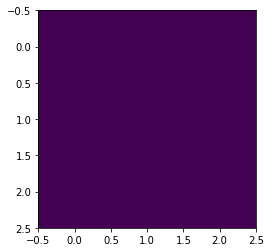

0.0


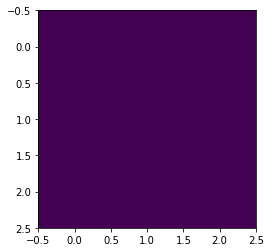

0.0


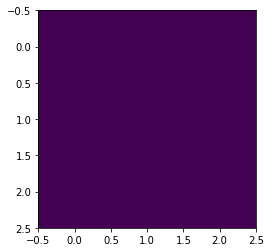

0.0


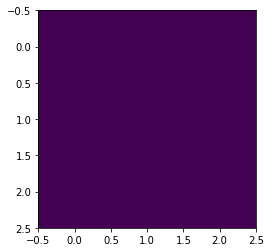

0.0


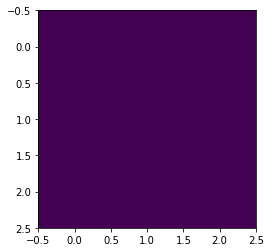

0.0


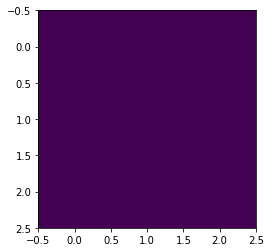

0.0


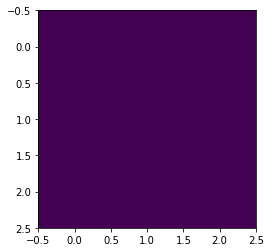

0.0


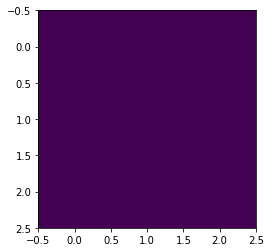

0.0


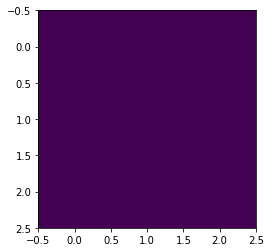

0.0


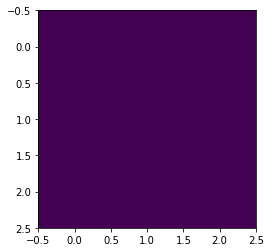

In [79]:
#for image, label in zip(training_set, label_set):
#    pylab.imshow(image[1, :,:])
#   
#    pylab.show()
 
    
num_im = 10
ll = 0

#(image, label) = zip(training_set, label_set)   


while ll < num_im:
    pylab.imshow(training_set[ll][1, :,:])
    print(label_set[ll])
    pylab.show()
    ll += 1

In [381]:
print(training_set[15][:,].shape)

(4, 3, 3)


In [382]:
training_data.shape

(4, 3475, 3560)

In [383]:
label_set = to_categorical(label_set)

In [384]:
label_set

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [385]:
training_set = np.asarray(training_set)
print(training_set.shape)

(12349904, 4, 3, 3)


In [386]:
training_set = training_set.reshape(training_set.shape[0], training_set.shape[1] * training_set.shape[2] * training_set.shape[3])

In [387]:
print(training_set.shape)

(12349904, 36)


In [388]:
label_set = np.asarray(label_set)
print(label_set.shape)

(12349904, 8)


In [389]:
dense_out_shape = label_set.shape[1]
dense_in_shape = training_set[0][:,].shape

## We need to balance our classes 

In [390]:
from sklearn.utils import class_weight

In [391]:
class_weights = np.abs(np.asarray(cl_balance) - 100.)

## Option 1.  We train an ANN

In [392]:
from keras import models
from keras import layers
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(dense_in_shape)))
model.add(BatchNormalization())
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(dense_out_shape, activation='softmax'))

In [393]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [394]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               9472      
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 2056      
Total params: 12,552
Trainable params: 12,040
Non-trainable params: 512
_________________________________________________________________


## Train the model 

In [395]:
history = model.fit(training_set, label_set, epochs=1, batch_size=100, validation_split=0.2, class_weight=class_weights)

Train on 9879923 samples, validate on 2469981 samples
Epoch 1/1
9879923/9879923 [==============================] - 341s 34us/step - loss: 0.2142 - acc: 0.9171 - val_loss: 0.0997 - val_acc: 0.9712


In [326]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [396]:
import pickle
model.save('weights.h5')
#history_file = open('../../data/models/2-1-GPU-history.pk', 'wb')
#pickle.dump(history_dict, file=history_file)
#history_file.close()

In [397]:
print('val_loss: {}'.format(history_dict['val_loss'][-1]))
print(' val_acc: {}'.format(history_dict['val_acc'][-1]))
print('    loss: {}'.format(history_dict['loss'][-1]))
print('     acc: {}'.format(history_dict['acc'][-1]))

val_loss: 1.4589860557112224
 val_acc: 0.9094814919898264
    loss: 3.2698663582555256
     acc: 0.5851621418275503


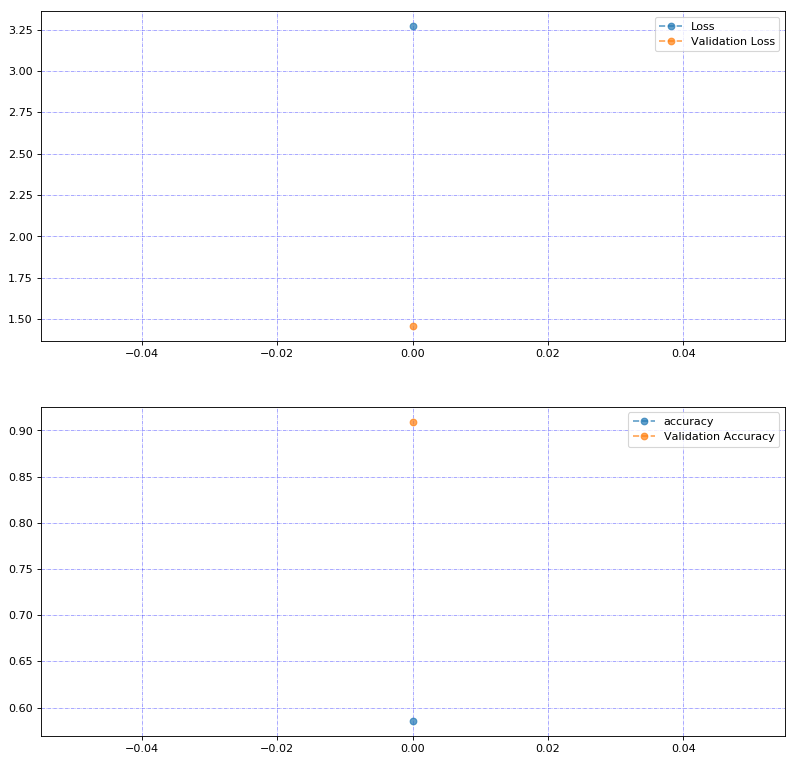

In [328]:
f, (ax1, ax2) = pylab.subplots(2, 1, figsize=(12, 12), dpi= 80)
ax1.grid(color='b', linestyle='-.', linewidth=0.5, alpha=0.6)
pylab.grid(color='b', linestyle='-.', linewidth=0.5, alpha=0.6)

ax1.plot(history_dict['loss'], 'o--', label='Loss', alpha=0.7)
ax1.plot(history_dict['val_loss'], 'o--', label='Validation Loss', alpha=0.7)
ax1.legend()

ax2.plot(history_dict['acc'], 'o--', label='accuracy', alpha=0.7)
ax2.plot(history_dict['val_acc'], 'o--', label='Validation Accuracy', alpha=0.7)
ax2.legend()

In [329]:
test_loss, test_acc = model.evaluate(training_set, label_set)

493434/493434 [==============================] - 17s 35us/step


In [ ]:
print(test_acc)

In [ ]:
s=0
cl_balance = []
print("====")
for ii in range(8):
    cl_balance.append(np.round((np.sum(label_data==ii)) / np.sum(label_data) * 100, 2))
    print('{} %'.format(np.round((np.sum(label_data==ii)) / np.sum(label_data) * 100, 2)))
    s += np.sum(label_data==ii) / np.sum(label_data)
print("====")  
print(s)

In [123]:
np.sum(label_data==1)

1675915

In [124]:
np.count_nonzero(label_data[label_data==1])

1675915

In [125]:
np.count_nonzero(label_data)

4243014

In [127]:
1675915 / 4243014

0.39498219897459685

In [151]:
class_weights

-94.15

In [213]:
cls = np.abs(np.asarray(cl_balance) - 100.) / 100

In [214]:
lbl = [0,1,2,3,4,5,6,7]
class_weights = {}
for ii, item in enumerate(lbl):
    class_weights[item] = cls[ii] 
    



In [225]:
class_weights

{0: 0.32420000000000004,
 1: 0.8606999999999999,
 2: 0.9261,
 3: 0.941,
 4: 0.9974,
 5: 0.9997,
 6: 0.9809,
 7: 0.9415}

In [405]:
new_image = [] #np.zeros_like(training_data[0, :, :])

In [ ]:
for ii in range(nrows):
    for jj in range(ncols):
        p = training_data[:, ii:ii+k[0], jj:jj+k[1]]
        p = p.reshape(p.shape[0]* p.shape[1] * p.shape[2])
        a =  model.predict_classes(np.array( [p,]))
        new_image.append(a)

In [400]:
len(new_image)

12349904

In [401]:
new_image = np.asarray(new_image)
new_image.shape

(12349904,)

In [404]:
new_image[10000]

0.99998605

In [362]:
#new_image = np.asarray(new_image)
new_image = new_image.reshape(nrows /5, ncols/5)
pylab.imshow(new_image)

TypeError: 'float' object cannot be interpreted as an integer

In [357]:
new_image

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [262]:
ii =0
jj = 0
training_data[:, ii:ii+k[0], jj:jj+k[1]].shape

(4, 3, 3)

In [373]:
(ncols - 6) / 5

141.0

In [376]:
(nrows - 7) / 5

137.4

In [255]:
ii+k[0]

3

In [257]:
training_data.shape

(4, 3475, 3560)

In [267]:
new_image.shape

(3475, 3560)

In [336]:
p = training_data[:, ii:ii+k[0], jj:jj+k[1]]
p = p.reshape(p.shape[0]* p.shape[1] * p.shape[2])
print(p.shape)

(36,)


In [344]:
A = model.predict_classes(np.array( [p,]))

In [346]:
A


array([0])

In [289]:
training_data[1:3].shape

(2, 3475, 3560)

In [ ]:
https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/